### Amazon Customer Feedback Analysis

This program uses unsupervised & self-supervised NLP models such as VADER and RoBERTa to evaluate the sentiment of a review of an Amazon product.

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib as plt
import datetime

In [2]:
url = 'https://www.amazon.com/Ordinary-Control-Face-Serum-30ml/dp/B09TSP9L59/ref=sr_1_5?keywords=the+ordinary+chemical+peel&qid=1655755762&sprefix=the+ordinary+che%2Caps%2C103&sr=8-5'
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

In [3]:
pg = requests.get(url, headers = headers)

soup = BeautifulSoup(pg.content, "html.parser")
soup = BeautifulSoup(soup.prettify())
title = soup.find(id='productTitle').string.strip()

In [4]:
price = soup.find("span", {"class": 'a-offscreen'}).get_text().strip().split()[0]

In [5]:
print(title, " costs ", price +" as of " + str(pd.datetime.now().date()) )

The New Ordinary AHA 30% + BHA 2% Oil Control Face Serum,30ml  costs  $14.80 as of 2022-08-04


C:\Users\alex_\AppData\Local\Temp/ipykernel_44996/1832982044.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  print(title, " costs ", price +" as of " + str(pd.datetime.now().date()) )


In [6]:
overall_feedback = soup.findAll("a", {"data-hook": 'review-title'})

print("Overall feeback : " +  '\n')
fed = []

for i in overall_feedback:
  
    fed.append(i.get_text().strip())
    print(i.get_text().strip() + '\n')

Overall feeback : 

Overpriced

THIS STUFF WORKS

Love!

Bueno

Amazing!! Love it

Es lo máximo!

don't expect too much

Good stuff



In [7]:
reviews = soup.findAll("div", {"data-hook": 'review-collapsed'})

print("Reviews : " +  '\n')
rev = []

for i in reviews:
  
    rev.append(i.get_text().strip())
    print(i.get_text().strip() + '\n')

Reviews : 

Product is okay but overpriced with Amazon.  Next time will purchase from Sephora or Ulta for $8

Products from The Ordinary are amazing, especially at their price point.  I ordered a variety of products from The Ordinary and discovered that I didn't understand what I needed.  If you are looking for a peeling solution that works, this is a great product.  When you put the product on your face, it looks like your face is bleeding.  You can scare your family members, fun times.  Since this product doesn't play, you may feel some tingling or burning.  If you're a weakling that gets frightened by any product sensation, this isn't for you.  I recommend a good serum, SPF, and moisturizer after use.

It gives a beautiful glow !

Un muy buen producto. Me está gustando mucho. Apenas lo use 3 semanas y si veo diferencia en mi piel.  Me esta dando muy buen resultado.

Not sure why everyone in the reviews doesn’t like this product lol it’s amazing I love it!!

Excelente producto. Recom

In [8]:
#get rating
ratings = soup.findAll("i", {"data-hook": 'review-star-rating'})
ratings

print("Ratings : " +  '\n')
rate = []

for i in ratings:
  
    rate.append(i.get_text().strip()[:3])
    print(i.get_text().strip() + '\n')
    

Ratings : 

3.0 out of 5 stars

5.0 out of 5 stars

5.0 out of 5 stars

5.0 out of 5 stars

5.0 out of 5 stars

5.0 out of 5 stars

4.0 out of 5 stars

5.0 out of 5 stars



In [9]:
person=[1,2,3,4,5,6,7,8]

dict = {'Person': person, 'Ratings': rate, 'Overall feedback': fed,'Reviews': rev}
df = pd.DataFrame(dict) 
df

,Person,Ratings,Overall feedback,Reviews
0,1,3.0,Overpriced,Product is okay but overpriced with Amazon. N...
1,2,5.0,THIS STUFF WORKS,"Products from The Ordinary are amazing, especi..."
2,3,5.0,Love!,It gives a beautiful glow !
3,4,5.0,Bueno,Un muy buen producto. Me está gustando mucho. ...
4,5,5.0,Amazing!! Love it,Not sure why everyone in the reviews doesn’t l...
5,6,5.0,Es lo máximo!,Excelente producto. Recomendado
6,7,4.0,don't expect too much,The product leaves your skin smooth. Other tha...
7,8,5.0,Good stuff,This stuff is strong. I actually exfoliate bef...


#### Visualization

<AxesSubplot:title={'center':'Count of Reviews by Stars'}, xlabel='Review Stars', ylabel='Star Count'>

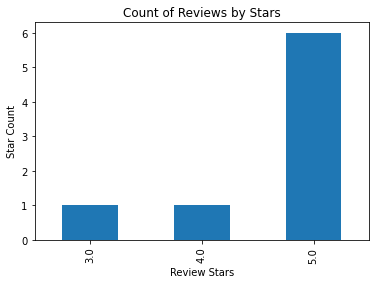

In [10]:
ax = df['Ratings'].value_counts().sort_index().plot(kind='bar',title='Count of Reviews by Stars')

ax.set_xlabel('Review Stars')
ax.set_ylabel('Star Count')
ax


#### Preprocess

Remove stop words.

In [11]:
#Import dependencies
import nltk
from nltk.corpus import stopwords
from textblob import Word, TextBlob

In [12]:
stop_words = stopwords.words('english', 'spanish')

In [13]:
def preprocess_reviews(review, stop_words):
    preprocessed_review = review
    preprocessed_review.replace('[^\w\s]', '')
    #remove word if it is a stop word
    preprocessed_review = " ".join(word for word in preprocessed_review.split() if word not in stop_words)
    #reduce word to base format
    preprocessed_review = " ".join(Word(word).lemmatize() for word in preprocessed_review.split())
    return preprocessed_review 
    

In [14]:
df['Preprocessed Reviews'] = df['Reviews'].apply(lambda x: preprocess_reviews(x, stop_words))
df

,Person,Ratings,Overall feedback,Reviews,Preprocessed Reviews
0,1,3.0,Overpriced,Product is okay but overpriced with Amazon. N...,Product okay overpriced Amazon. Next time purc...
1,2,5.0,THIS STUFF WORKS,"Products from The Ordinary are amazing, especi...","Products The Ordinary amazing, especially pric..."
2,3,5.0,Love!,It gives a beautiful glow !,It give beautiful glow !
3,4,5.0,Bueno,Un muy buen producto. Me está gustando mucho. ...,Un muy buen producto. Me está gustando mucho. ...
4,5,5.0,Amazing!! Love it,Not sure why everyone in the reviews doesn’t l...,Not sure everyone review doesn’t like product ...
5,6,5.0,Es lo máximo!,Excelente producto. Recomendado,Excelente producto. Recomendado
6,7,4.0,don't expect too much,The product leaves your skin smooth. Other tha...,"The product leaf skin smooth. Other that, I ha..."
7,8,5.0,Good stuff,This stuff is strong. I actually exfoliate bef...,This stuff strong. I actually exfoliate I use ...


### Sentiment Analysis

TextBlob

In [15]:
# Calculate polarity
df['Polarity'] = df['Preprocessed Reviews'].apply(lambda x: TextBlob(x).sentiment[0])
df['Subjectivity'] = df['Preprocessed Reviews'].apply(lambda x: TextBlob(x).sentiment[1])
df.head()

,Person,Ratings,Overall feedback,Reviews,Preprocessed Reviews,Polarity,Subjectivity
0,1,3.0,Overpriced,Product is okay but overpriced with Amazon. N...,Product okay overpriced Amazon. Next time purc...,0.250000,0.250000
1,2,5.0,THIS STUFF WORKS,"Products from The Ordinary are amazing, especi...","Products The Ordinary amazing, especially pric...",0.271429,0.635714
2,3,5.0,Love!,It gives a beautiful glow !,It give beautiful glow !,1.000000,1.000000
3,4,5.0,Bueno,Un muy buen producto. Me está gustando mucho. ...,Un muy buen producto. Me está gustando mucho. ...,0.000000,0.000000
4,5,5.0,Amazing!! Love it,Not sure why everyone in the reviews doesn’t l...,Not sure everyone review doesn’t like product ...,0.482813,0.772222


VADER

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [17]:
#get sentiment scores
def getSIA(text):
    
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    return sentiment

In [18]:
#get sentiment score for each review

compound = []
neg = []
pos = []
neu = []

for r in df['Reviews']:
    SIA = getSIA(r)
    compound.append(SIA['compound'])
    neg.append(SIA['pos'])
    pos.append(SIA['neg'])
    neu.append(SIA['neu'])

In [19]:
#Store sentiment scores in dataset
df['Overall Sentiment'] = compound
df['Negative'] = neg
df['Positive'] = pos
df['Neutral'] = neu
df

,Person,Ratings,Overall feedback,Reviews,Preprocessed Reviews,Polarity,Subjectivity,Overall Sentiment,Negative,Positive,Neutral
0,1,3.0,Overpriced,Product is okay but overpriced with Amazon. N...,Product okay overpriced Amazon. Next time purc...,0.250000,0.250000,0.3612,0.189,0.000,0.811
1,2,5.0,THIS STUFF WORKS,"Products from The Ordinary are amazing, especi...","Products The Ordinary amazing, especially pric...",0.271429,0.635714,0.8102,0.164,0.109,0.728
2,3,5.0,Love!,It gives a beautiful glow !,It give beautiful glow !,1.000000,1.000000,0.6360,0.583,0.000,0.417
3,4,5.0,Bueno,Un muy buen producto. Me está gustando mucho. ...,Un muy buen producto. Me está gustando mucho. ...,0.000000,0.000000,0.0000,0.000,0.000,1.000
4,5,5.0,Amazing!! Love it,Not sure why everyone in the reviews doesn’t l...,Not sure everyone review doesn’t like product ...,0.482813,0.772222,0.9173,0.517,0.073,0.410
5,6,5.0,Es lo máximo!,Excelente producto. Recomendado,Excelente producto. Recomendado,0.000000,0.000000,0.0000,0.000,0.000,1.000
6,7,4.0,don't expect too much,The product leaves your skin smooth. Other tha...,"The product leaf skin smooth. Other that, I ha...",0.162500,0.437500,0.5647,0.237,0.000,0.763
7,8,5.0,Good stuff,This stuff is strong. I actually exfoliate bef...,This stuff strong. I actually exfoliate I use ...,0.286667,0.446667,0.7351,0.118,0.000,0.882


#### Compare overall sentiment score with ratings

Text(0.5, 1.0, 'Overall Score by Amazon Star Review')

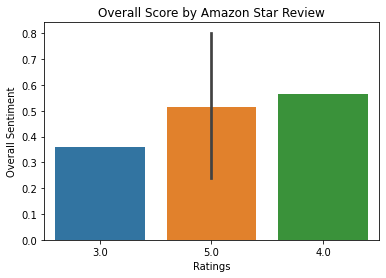

In [20]:
ax = sns.barplot(data=df, x='Ratings', y='Overall Sentiment')
ax.set_title('Overall Score by Amazon Star Review')

#### RoBERTa Model from Hugging Face transformers
Transfer Learning

This model is trained on a large corpus of data. Transformer model accounts for the words but also for the context and the relationship between words.

In [21]:

from transformers import AutoTokenizer, TFAutoModelForSequenceClassification 
from scipy.special import softmax #to normalize between 0 and 1

In [22]:
# load model and tokenizer
roberta = "cardiffnlp/twitter-roberta-base-sentiment"

model = TFAutoModelForSequenceClassification.from_pretrained(roberta)
tokenizer = AutoTokenizer.from_pretrained(roberta)



All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [23]:
def polarity_scores_roberta(text):
    
    encoded_text = tokenizer(text, return_tensors='tf')
    
    # output = model(encoded_tweet['input_ids'], encoded_tweet['attention_mask'])
    
   # Inputs ids: it’s kinda self explanatory, it’s the tensor obtained from converting the tweet into numbers.

    #Attention mask: this argument indicates to the model which tokens should get more attention, and which should not.
    
    output = model(**encoded_text)
    score = output[0][0].numpy()
    score = softmax(score)
    score_dict ={
       'roberta_Negative' : score[0],
       'roberta_Neutral' : score[1],
       'roberta_Positive' : score[2],
       }
    return score_dict

In [24]:
from tqdm.notebook import tqdm
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
   
        text = row['Reviews']
        myid = i
       
        roberta_result = polarity_scores_roberta(text)
        res[myid] = roberta_result

  0%|          | 0/8 [00:00<?, ?it/s]

In [25]:
res = pd.DataFrame.from_dict(res).T
res

,roberta_Negative,roberta_Neutral,roberta_Positive
0,0.086407,0.402382,0.511211
1,0.165997,0.320522,0.513481
2,0.001440,0.024701,0.973859
3,0.185507,0.701929,0.112565
4,0.048737,0.064936,0.886327
5,0.017265,0.376639,0.606095
6,0.007999,0.128160,0.863841
7,0.006036,0.063420,0.930544


In [32]:
df_combined = pd.concat([df,res], axis=1)
df_combined = df_combined.rename(columns = {'Negative':'vaders_Negative', 'Positive':'vaders_Positive', 'Neutral':'vaders_Neutral', 'Overall Sentiment':'overall_Setiment_Vaders'})

df_combined.set_index('Person', inplace = True)
df_combined

,Ratings,Overall feedback,Reviews,Preprocessed Reviews,Polarity,Subjectivity,overall_Setiment_Vaders,vaders_Negative,vaders_Positive,vaders_Neutral,roberta_Negative,roberta_Neutral,roberta_Positive
Person,,,,,,,,,,,,,
1,3.0,Overpriced,Product is okay but overpriced with Amazon. N...,Product okay overpriced Amazon. Next time purc...,0.250000,0.250000,0.3612,0.189,0.000,0.811,0.086407,0.402382,0.511211
2,5.0,THIS STUFF WORKS,"Products from The Ordinary are amazing, especi...","Products The Ordinary amazing, especially pric...",0.271429,0.635714,0.8102,0.164,0.109,0.728,0.165997,0.320522,0.513481
3,5.0,Love!,It gives a beautiful glow !,It give beautiful glow !,1.000000,1.000000,0.6360,0.583,0.000,0.417,0.001440,0.024701,0.973859
4,5.0,Bueno,Un muy buen producto. Me está gustando mucho. ...,Un muy buen producto. Me está gustando mucho. ...,0.000000,0.000000,0.0000,0.000,0.000,1.000,0.185507,0.701929,0.112565
5,5.0,Amazing!! Love it,Not sure why everyone in the reviews doesn’t l...,Not sure everyone review doesn’t like product ...,0.482813,0.772222,0.9173,0.517,0.073,0.410,0.048737,0.064936,0.886327
6,5.0,Es lo máximo!,Excelente producto. Recomendado,Excelente producto. Recomendado,0.000000,0.000000,0.0000,0.000,0.000,1.000,0.017265,0.376639,0.606095
7,4.0,don't expect too much,The product leaves your skin smooth. Other tha...,"The product leaf skin smooth. Other that, I ha...",0.162500,0.437500,0.5647,0.237,0.000,0.763,0.007999,0.128160,0.863841
8,5.0,Good stuff,This stuff is strong. I actually exfoliate bef...,This stuff strong. I actually exfoliate I use ...,0.286667,0.446667,0.7351,0.118,0.000,0.882,0.006036,0.063420,0.930544


RoBERTa model is more accurate than Vader

In [33]:
df_combined.to_csv('Reviews Sentiment Analysis.csv')

#### Visualizations

Text(0.5, 1.0, 'Positive Score by Amazon Star Review')

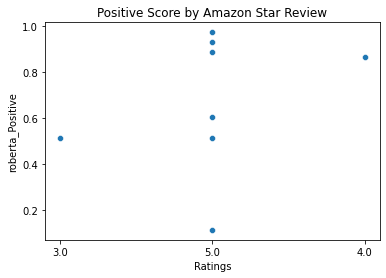

In [34]:
ax = sns.scatterplot(data=df_combined, x='Ratings', y='roberta_Positive')
ax.set_title('Positive Score by Amazon Star Review')

Text(0.5, 1.0, 'Negative Score by Amazon Star Review')

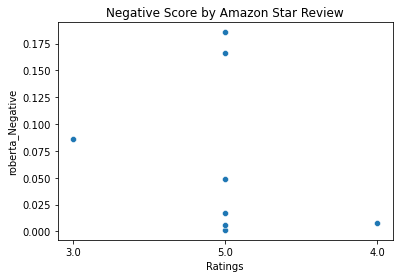

In [35]:
ax = sns.scatterplot(data=df_combined, x='Ratings', y='roberta_Negative')
ax.set_title('Negative Score by Amazon Star Review')